In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show") 

# Uyarı mesajlarını göstermemek için uyarı filtresi uygular. 
# Bu, kodu çalıştırdığınızda uyarı mesajlarının görünmesini engeller.


plt.rcParams["figure.figsize"] = (10,6)
# Matplotlib kütüphanesindeki grafik boyutlarını (figür boyutu) ayarlar. 
# Burada (10,6), genişliği 10 ve yüksekliği 6 birim olan bir çerçeve boyutu belirtilir.

sns.set_style("whitegrid")
# Seaborn kütüphanesindeki grid görünümünü beyaz bir arka planla ayarlar.

pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pandas kütüphanesindeki float formatını ayarlar. 
# Burada lambda fonksiyonu kullanılarak, ondalık sayıların görüntülenme formatı ayarlanır.

pd.set_option('display.max_rows', None)
# veri çerçevelerindeki tüm satırların görüntülenmesini istemiyorsanız, display.max_rows seçeneğini None olarak ayarlar.

pd.set_option('display.max_columns', None)
# veri çerçevelerindeki tüm sütunların görüntülenmesini istemiyorsanız, display.max_columns seçeneğini None olarak ayarlar.


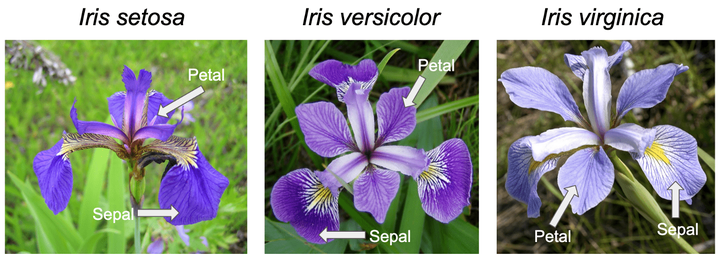

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100,3.500,1.400,0.200,setosa
1,4.900,3.000,1.400,0.200,setosa
2,4.700,3.200,1.300,0.200,setosa
3,4.600,3.100,1.500,0.200,setosa
4,5.000,3.600,1.400,0.200,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000,-0.118,0.872,0.818
sepal_width,-0.118,1.000,-0.428,-0.366
petal_length,0.872,-0.428,1.000,0.963
petal_width,0.818,-0.366,0.963,1.000


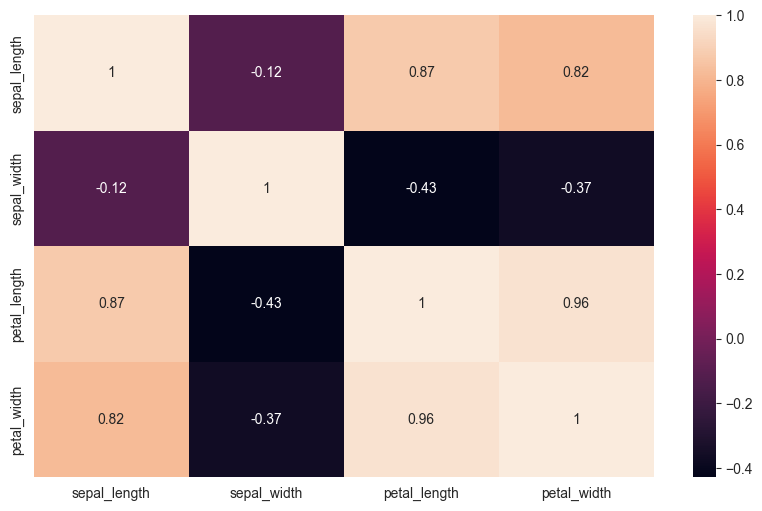

In [5]:
sns.heatmap(df.corr(), annot = True);

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.000,5.843,0.828,4.300,5.100,5.800,6.400,7.900
sepal_width,150.000,3.057,0.436,2.000,2.800,3.000,3.300,4.400
petal_length,150.000,3.758,1.765,1.000,1.600,4.350,5.100,6.900
petal_width,150.000,1.199,0.762,0.100,0.300,1.300,1.800,2.500


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

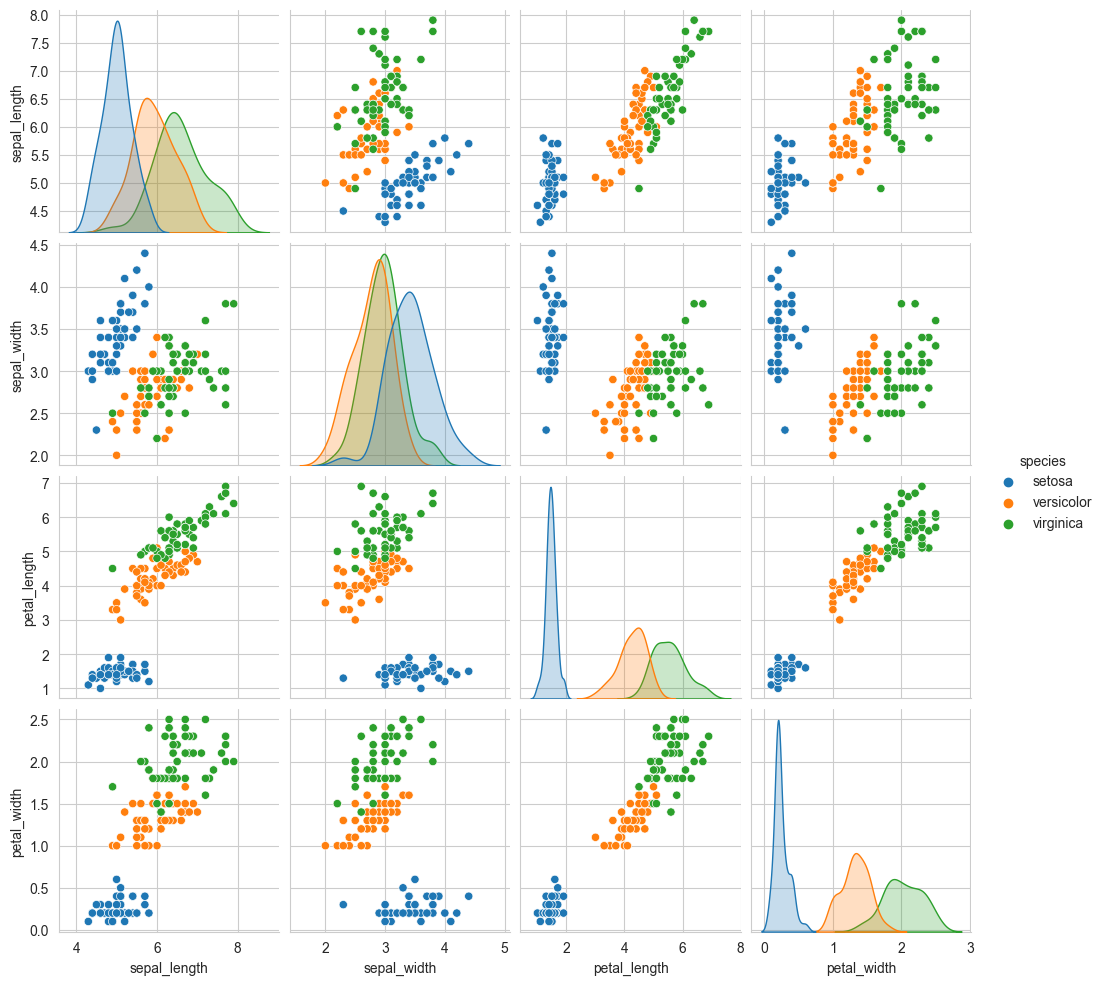

In [8]:
sns.pairplot(df, hue = "species");

* Setosa, differentiates more clearly than other species.

# Eda and Visualization

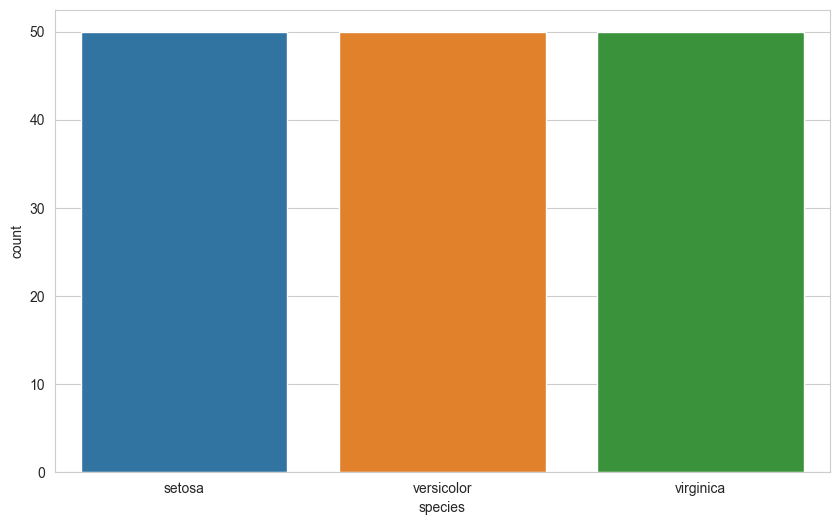

In [16]:
sns.countplot(df["species"]);   # balanced data

## Sepal_length

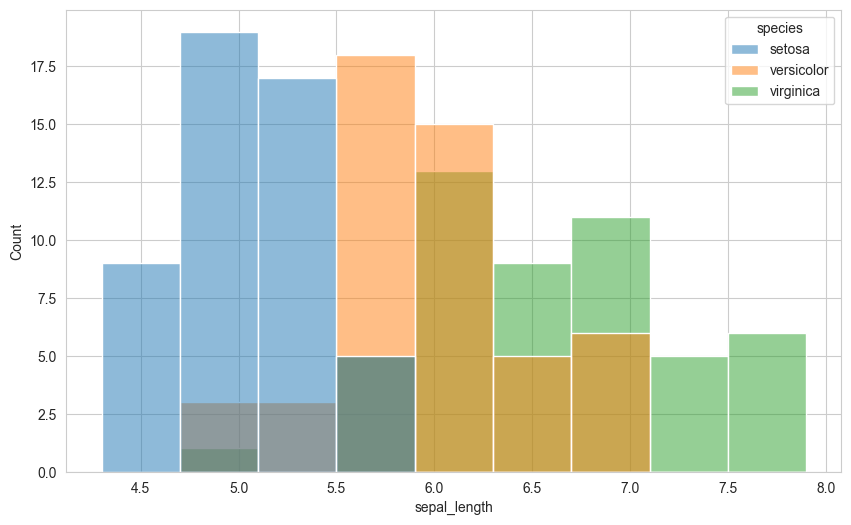

In [9]:
sns.histplot(data=df, x = "sepal_length", hue = "species");

In [21]:
import plotly.express as px


fig = px.scatter(df, x="sepal_length", size= "sepal_width", color='species', title='Species Bazında Scatter Plot', color_discrete_sequence=px.colors.qualitative.Set1)

# Scatter plot'u göstermek için aşağıdaki satırı kullanabilirsiniz
fig.show()

Text(0.5, 1.0, 'sepal_length by species')

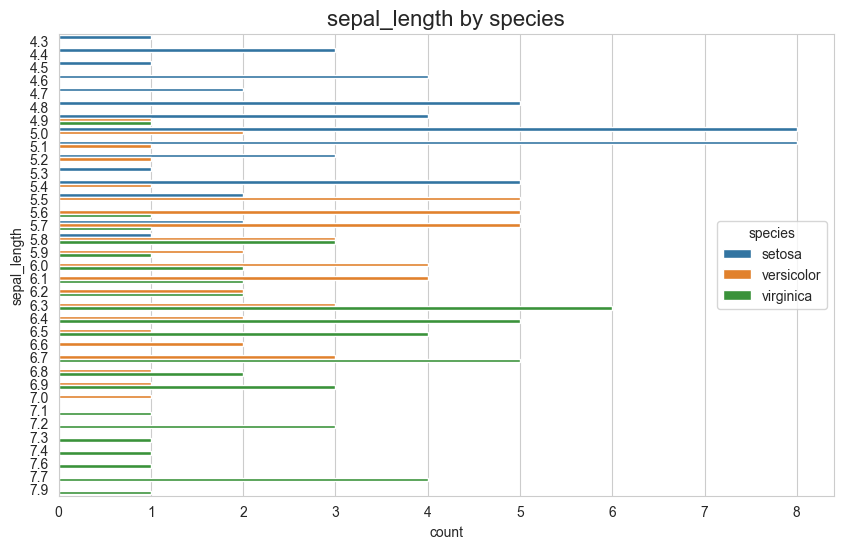

In [10]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y = df['sepal_length'], hue = df['species'])
plt.title("sepal_length by species", fontsize = 16)

* Those with sepal_length above 7.1 are definitely viginica.
* Those with sepal_length below 4.9 are definitely setosa.

## Sepal_width 

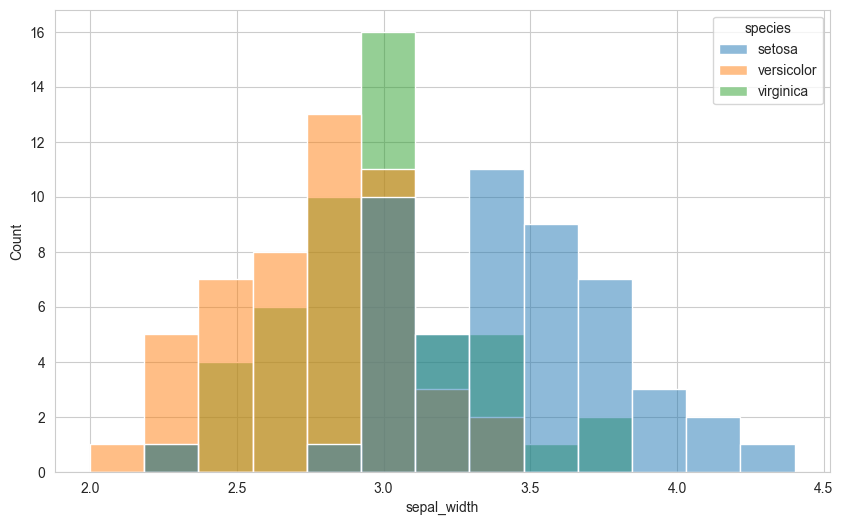

In [11]:
sns.histplot(df, x = df["sepal_width"], hue = "species");

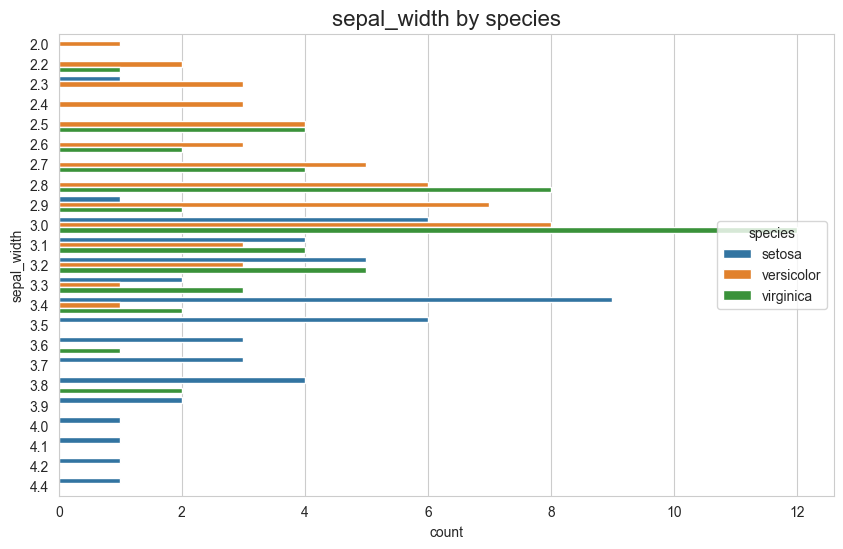

In [12]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y = df['sepal_width'], hue = df['species'])
plt.title("sepal_width by species", fontsize = 16);

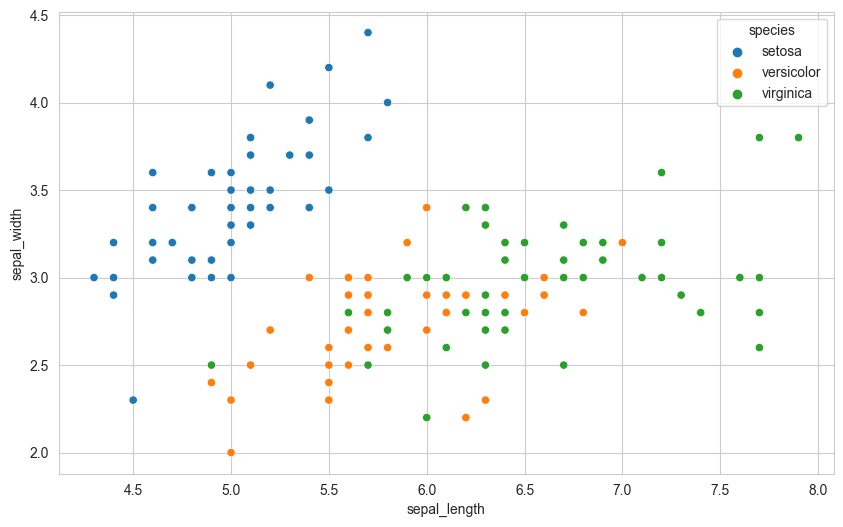

In [13]:
sns.scatterplot( x = df["sepal_length"], y = df["sepal_width"], hue = df["species"]);

* According to sepal_width, there is a gradient structure between species between 2.5 and 3.5.

## Petal_lenght

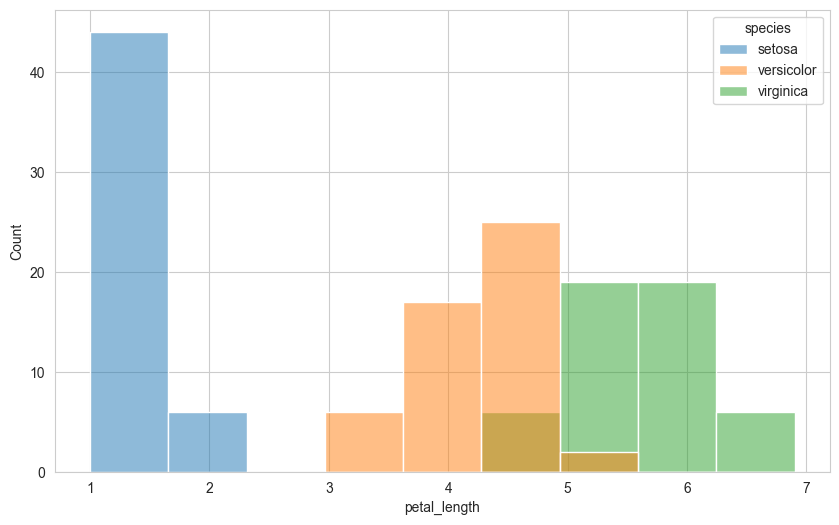

In [14]:
sns.histplot(data=df, x = "petal_length", hue = "species");

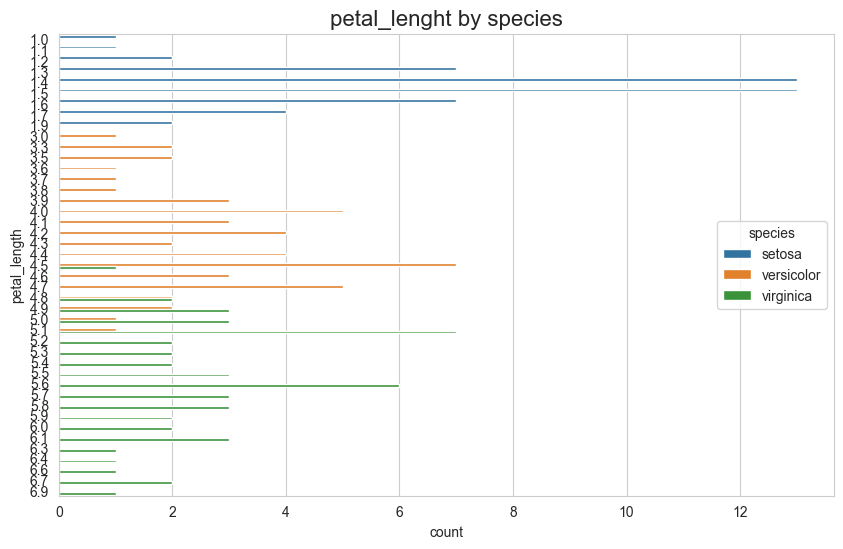

In [15]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y = df['petal_length'], hue = df['species'])
plt.title("petal_lenght by species", fontsize = 16);

* According to petal_length, setosa differs very well from other species.

## Petal_width

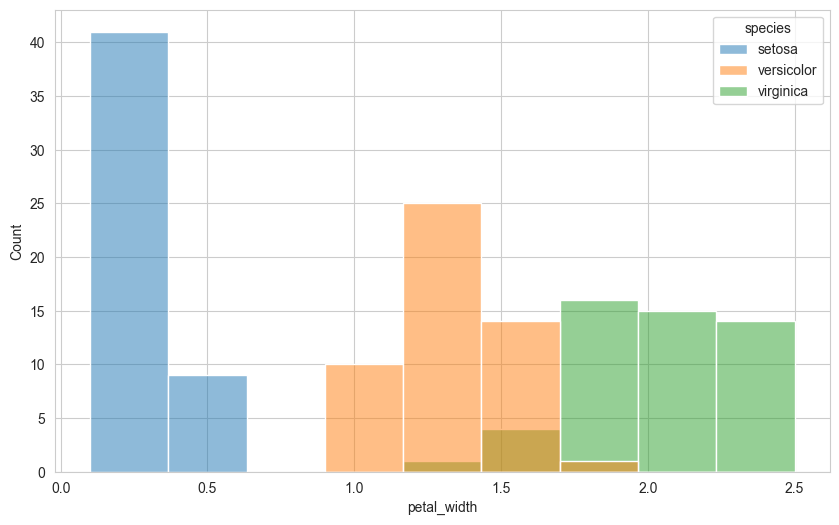

In [16]:
sns.histplot(data=df, x = "petal_width", hue = "species");

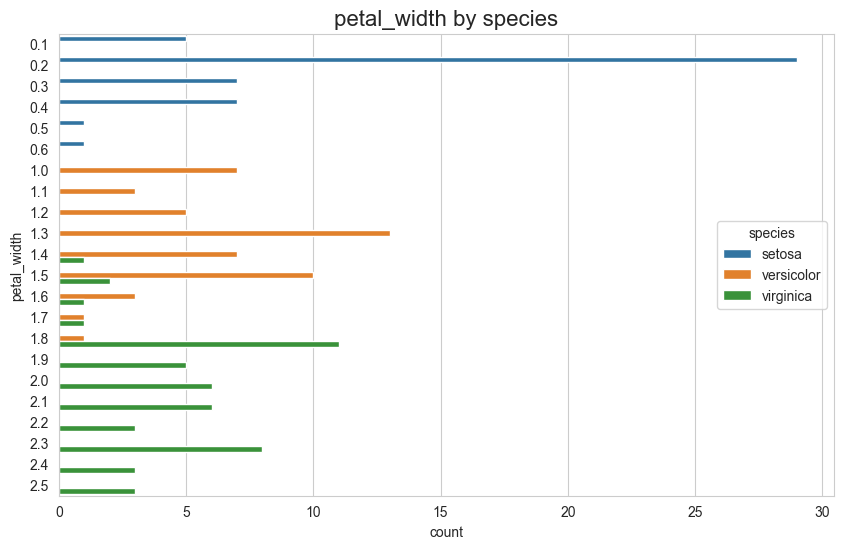

In [17]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y = df['petal_width'], hue = df['species'])
plt.title("petal_width by species", fontsize = 16);

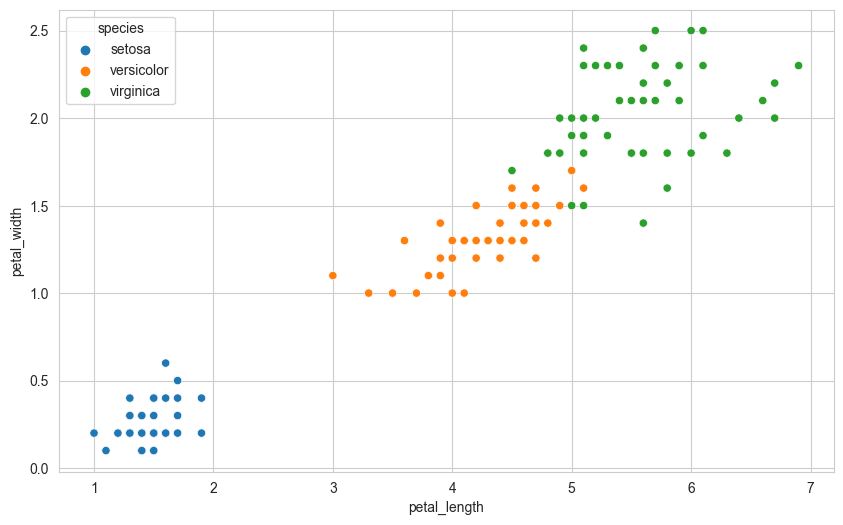

In [18]:
sns.scatterplot( x = df["petal_length"], y = df["petal_width"], hue = df["species"]);

* petal_width and petal_length are better at separating species than sepal_width and sepal_length.

In [19]:
from mpl_toolkits.mplot3d import Axes3D

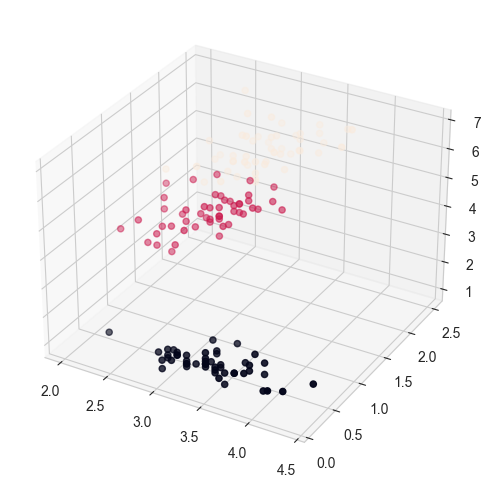

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
colors = df["species"].map({"setosa":0, "versicolor":1, "virginica":2})
ax.scatter(df["sepal_width"], df["petal_width"], df["petal_length"], c=colors)
plt.show()

In [3]:
df["species"] = df["species"].map({"setosa":0, "versicolor":1, "virginica":2})

In [22]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
32,5.200,4.100,1.500,0.100,0
103,6.300,2.900,5.600,1.800,2
106,4.900,2.500,4.500,1.700,2
16,5.400,3.900,1.300,0.400,0
50,7.000,3.200,4.700,1.400,1
44,5.100,3.800,1.900,0.400,0
60,5.000,2.000,3.500,1.000,1
146,6.300,2.500,5.000,1.900,2
102,7.100,3.000,5.900,2.100,2
119,6.000,2.200,5.000,1.500,2


# Train/ Test Split - Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop(columns = "species")
y = df["species"]

In [6]:
seed = 101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=seed)

In [7]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ANN

In [8]:
import tensorflow as tf
from keras import models
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam

In [37]:
tf.random.set_seed(seed)

model = Sequential([Dense(units = 4,  activation = "relu"),    
                    Dense(units = 8, activation = "relu"),  
                    Dense(units = 4, activation = "tanh"),
                    Dense(units = 3, activation = "softmax")])

opt = Adam(learning_rate = 0.002)
model.compile(optimizer = opt, 
             loss = "sparse_categorical_crossentropy",
              metrics =["accuracy"])

In [39]:
model.fit(x = X_train, y = y_train, batch_size = 16 ,validation_split = 0.1, epochs = 150,verbose = 1) 

Epoch 1/150
7/7 [==============================] - 0s 39ms/step - loss: 0.1053 - accuracy: 0.9537 - val_loss: 0.1221 - val_accuracy: 1.0000
Epoch 2/150
7/7 [==============================] - 0s 22ms/step - loss: 0.1032 - accuracy: 0.9630 - val_loss: 0.1223 - val_accuracy: 1.0000
Epoch 3/150
7/7 [==============================] - 0s 23ms/step - loss: 0.1027 - accuracy: 0.9630 - val_loss: 0.1121 - val_accuracy: 1.0000
Epoch 4/150
7/7 [==============================] - 0s 20ms/step - loss: 0.1008 - accuracy: 0.9537 - val_loss: 0.1170 - val_accuracy: 1.0000
Epoch 5/150
7/7 [==============================] - 0s 24ms/step - loss: 0.1001 - accuracy: 0.9630 - val_loss: 0.1171 - val_accuracy: 1.0000
Epoch 6/150
7/7 [==============================] - 0s 24ms/step - loss: 0.1002 - accuracy: 0.9537 - val_loss: 0.1053 - val_accuracy: 1.0000
Epoch 7/150
7/7 [==============================] - 0s 27ms/step - loss: 0.0990 - accuracy: 0.9537 - val_loss: 0.1097 - val_accuracy: 1.0000
Epoch 8/150
7/7 [===

7/7 [==============================] - 0s 26ms/step - loss: 0.0608 - accuracy: 0.9815 - val_loss: 0.0587 - val_accuracy: 1.0000
Epoch 118/150
7/7 [==============================] - 0s 37ms/step - loss: 0.0575 - accuracy: 0.9630 - val_loss: 0.0577 - val_accuracy: 1.0000
Epoch 119/150
7/7 [==============================] - 0s 27ms/step - loss: 0.0574 - accuracy: 0.9722 - val_loss: 0.0497 - val_accuracy: 1.0000
Epoch 120/150
7/7 [==============================] - 0s 25ms/step - loss: 0.0571 - accuracy: 0.9722 - val_loss: 0.0449 - val_accuracy: 1.0000
Epoch 121/150
7/7 [==============================] - 0s 26ms/step - loss: 0.0577 - accuracy: 0.9815 - val_loss: 0.0472 - val_accuracy: 1.0000
Epoch 122/150
7/7 [==============================] - 0s 28ms/step - loss: 0.0680 - accuracy: 0.9630 - val_loss: 0.0823 - val_accuracy: 0.9167
Epoch 123/150
7/7 [==============================] - 0s 27ms/step - loss: 0.0569 - accuracy: 0.9630 - val_loss: 0.0574 - val_accuracy: 1.0000
Epoch 124/150
7/7 [=

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 8)                 40        
                                                                 
 dense_6 (Dense)             (None, 4)                 36        
                                                                 
 dense_7 (Dense)             (None, 3)                 15        
                                                                 
Total params: 111 (444.00 Byte)
Trainable params: 111 (444.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.105,0.954,0.122,1.000
1,0.103,0.963,0.122,1.000
2,0.103,0.963,0.112,1.000
3,0.101,0.954,0.117,1.000
4,0.100,0.963,0.117,1.000


<AxesSubplot:>

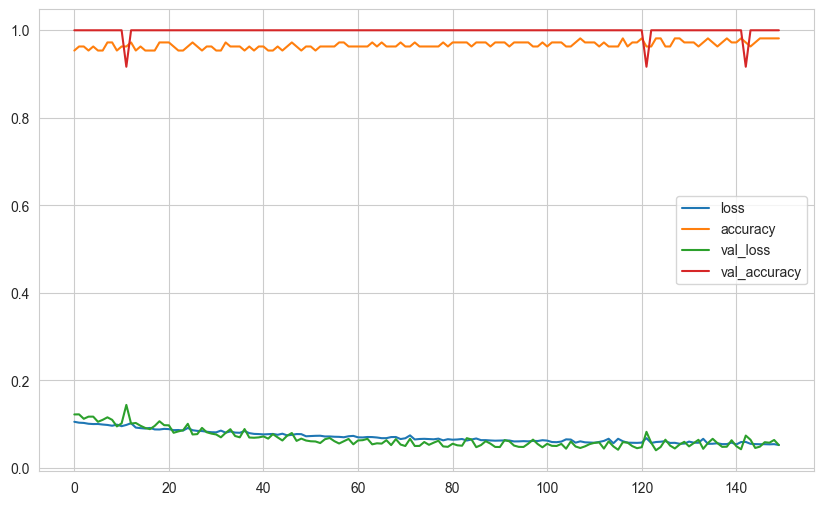

In [42]:
loss_df.plot()

## Eval metrik

In [43]:
# Eval Metrics fot Train;
from sklearn.metrics import classification_report, confusion_matrix

y_train_pred=model.predict(X_train)
probs = np.array(y_train_pred)
y_train_pred = np.argmax(probs, axis=1)

print(confusion_matrix(y_train, y_train_pred)) 
print(classification_report(y_train, y_train_pred))

4/4 [==============================] - 0s 4ms/step
[[40  0  0]
 [ 0 37  1]
 [ 0  1 41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.97      0.97        38
           2       0.98      0.98      0.98        42

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [44]:
# Eval Metrics fot Test; 

y_pred=model.predict(X_test)
probs = np.array(y_pred)
y_pred = np.argmax(probs, axis=1)

print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

1/1 [==============================] - 0s 57ms/step
[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Early Stop

In [45]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=50)



model.fit(x=X_train,
          y=y_train,
          validation_split=0.1,
          batch_size=16,
          epochs=300,
          verbose=1,
          callbacks=[early_stop])



Epoch 1/300
7/7 [==============================] - 0s 44ms/step - loss: 0.0561 - accuracy: 0.9815 - val_loss: 0.0473 - val_accuracy: 1.0000
Epoch 2/300
7/7 [==============================] - 0s 24ms/step - loss: 0.0532 - accuracy: 0.9815 - val_loss: 0.0526 - val_accuracy: 1.0000
Epoch 3/300
7/7 [==============================] - 0s 28ms/step - loss: 0.0533 - accuracy: 0.9722 - val_loss: 0.0643 - val_accuracy: 1.0000
Epoch 4/300
7/7 [==============================] - 0s 19ms/step - loss: 0.0530 - accuracy: 0.9722 - val_loss: 0.0626 - val_accuracy: 1.0000
Epoch 5/300
7/7 [==============================] - 0s 28ms/step - loss: 0.0528 - accuracy: 0.9815 - val_loss: 0.0588 - val_accuracy: 1.0000
Epoch 6/300
7/7 [==============================] - 0s 22ms/step - loss: 0.0527 - accuracy: 0.9815 - val_loss: 0.0517 - val_accuracy: 1.0000
Epoch 7/300
7/7 [==============================] - 0s 22ms/step - loss: 0.0531 - accuracy: 0.9815 - val_loss: 0.0532 - val_accuracy: 1.0000
Epoch 8/300
7/7 [===

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 8)                 40        
                                                                 
 dense_6 (Dense)             (None, 4)                 36        
                                                                 
 dense_7 (Dense)             (None, 3)                 15        
                                                                 
Total params: 111 (444.00 Byte)
Trainable params: 111 (444.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.056,0.981,0.047,1.000
1,0.053,0.981,0.053,1.000
2,0.053,0.972,0.064,1.000
3,0.053,0.972,0.063,1.000
4,0.053,0.981,0.059,1.000


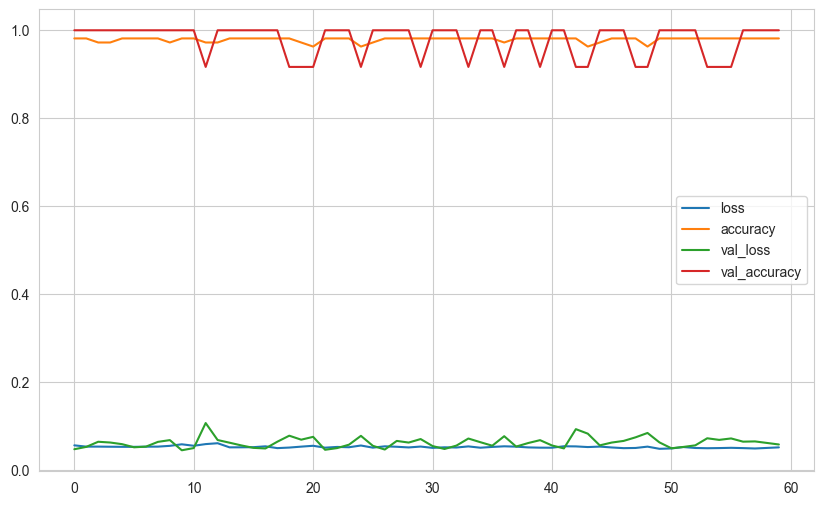

In [48]:
loss_df.plot();

In [49]:
# Eval Metrics fot Train; 

from sklearn.metrics import classification_report, confusion_matrix

print("----------------TRAİN------------------------------------------")
y_train_pred=model.predict(X_train)
probs = np.array(y_train_pred)
y_train_pred = np.argmax(probs, axis=1)

print(confusion_matrix(y_train, y_train_pred)) 
print(classification_report(y_train, y_train_pred))

print("----------------TEST------------------------------------------")

# Eval Metrics fot Test; 

y_pred=model.predict(X_test)
probs = np.array(y_pred)
y_pred = np.argmax(probs, axis=1)

print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

----------------TRAİN------------------------------------------
4/4 [==============================] - 0s 4ms/step
[[40  0  0]
 [ 0 37  1]
 [ 0  1 41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.97      0.97        38
           2       0.98      0.98      0.98        42

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

----------------TEST------------------------------------------
1/1 [==============================] - 0s 63ms/step
[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00

In [54]:
# lr =0.1  - validation_split= 0.2

model = Sequential([Dense(units = 4,  activation = "relu"),    
                    Dense(units = 8, activation = "relu"),  
                    Dense(units = 4, activation = "tanh"),
                    Dense(units = 3, activation = "softmax")])

# Optimizer'ı tanımla ve learning rate'i ayarla
optimizer = Adam(learning_rate=0.1)

# EarlyStopping callback'ini oluştur
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=50)

# Modeli derle
model.compile(optimizer=optimizer, loss = "sparse_categorical_crossentropy",
              metrics =["accuracy"])

# Verileri kullanarak modeli eğit
model.fit(x=X_train,
          y=y_train,
          validation_split=0.2,
          batch_size=16,
          epochs=205,
          verbose=1,
          callbacks=[early_stop])


Epoch 1/205
6/6 [==============================] - 3s 124ms/step - loss: 1.0532 - accuracy: 0.4271 - val_loss: 0.9337 - val_accuracy: 0.5833
Epoch 2/205
6/6 [==============================] - 0s 30ms/step - loss: 0.6632 - accuracy: 0.7083 - val_loss: 0.6674 - val_accuracy: 0.5833
Epoch 3/205
6/6 [==============================] - 0s 35ms/step - loss: 0.5327 - accuracy: 0.6354 - val_loss: 0.5674 - val_accuracy: 0.6250
Epoch 4/205
6/6 [==============================] - 0s 26ms/step - loss: 0.4795 - accuracy: 0.6042 - val_loss: 0.5886 - val_accuracy: 0.5833
Epoch 5/205
6/6 [==============================] - 0s 26ms/step - loss: 0.4661 - accuracy: 0.7083 - val_loss: 0.5656 - val_accuracy: 0.5833
Epoch 6/205
6/6 [==============================] - 0s 26ms/step - loss: 0.4735 - accuracy: 0.6146 - val_loss: 0.5509 - val_accuracy: 0.6250
Epoch 7/205
6/6 [==============================] - 0s 27ms/step - loss: 0.4475 - accuracy: 0.6771 - val_loss: 0.5780 - val_accuracy: 0.5833
Epoch 8/205
6/6 [==

In [55]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.053,0.427,0.934,0.583
1,0.663,0.708,0.667,0.583
2,0.533,0.635,0.567,0.625
3,0.479,0.604,0.589,0.583
4,0.466,0.708,0.566,0.583


<AxesSubplot:>

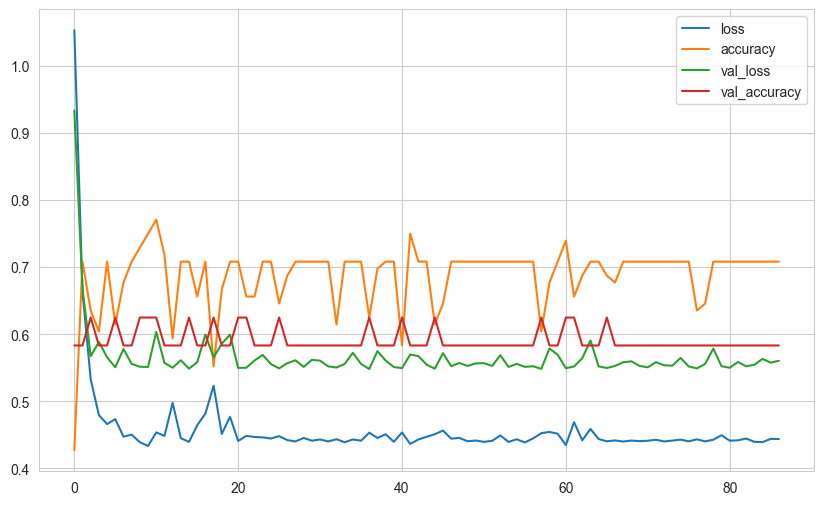

In [56]:
loss_df.plot()

In [57]:
# Eval Metrics fot Train; 

from sklearn.metrics import classification_report, confusion_matrix

print("----------------TRAİN------------------------------------------")
y_train_pred=model.predict(X_train)
probs = np.array(y_train_pred)
y_train_pred = np.argmax(probs, axis=1)

print(confusion_matrix(y_train, y_train_pred)) 
print(classification_report(y_train, y_train_pred))

print("----------------TEST------------------------------------------")

# Eval Metrics fot Test; 

y_pred=model.predict(X_test)
probs = np.array(y_pred)
y_pred = np.argmax(probs, axis=1)

print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

----------------TRAİN------------------------------------------
4/4 [==============================] - 0s 4ms/step
[[40  0  0]
 [ 0  0 38]
 [ 0  0 42]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.00      0.00      0.00        38
           2       0.53      1.00      0.69        42

    accuracy                           0.68       120
   macro avg       0.51      0.67      0.56       120
weighted avg       0.52      0.68      0.57       120

----------------TEST------------------------------------------
1/1 [==============================] - 0s 61ms/step
[[10  0  0]
 [ 0  0 12]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.00      0.00      0.00        12
           2       0.40      1.00      0.57         8

    accuracy                           0.60        30
   macro avg       0.47      0.67      0.52

* When I increased the learning rate to 0.1, the learning did not take place because the model consisted of less data.

## DropOut

In [63]:
# lr =0.002  - validation_split= 0.1
from keras.layers import Dense, Dropout

model = Sequential([Dense(units = 4,  activation = "relu"), 
                     Dropout(0.2),
                    Dense(units = 16, activation = "relu"),  
                    Dropout(0.3),
                    Dense(units = 24, activation = "tanh"),
                    Dense(units = 3, activation = "softmax")])

# Optimizer'ı tanımla ve learning rate'i ayarla
optimizer = Adam(learning_rate=0.002)

# EarlyStopping callback'ini oluştur
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=50)

# Modeli derle
model.compile(optimizer=optimizer, loss = "sparse_categorical_crossentropy",
              metrics =["accuracy"])

# Verileri kullanarak modeli eğit
model.fit(x=X_train,
          y=y_train,
          validation_split=0.1,
          batch_size=16,
          epochs=300,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/300
7/7 [==============================] - 3s 91ms/step - loss: 1.0957 - accuracy: 0.2500 - val_loss: 1.1142 - val_accuracy: 0.1667
Epoch 2/300
7/7 [==============================] - 0s 22ms/step - loss: 1.0796 - accuracy: 0.3519 - val_loss: 1.1236 - val_accuracy: 0.1667
Epoch 3/300
7/7 [==============================] - 0s 19ms/step - loss: 1.0760 - accuracy: 0.3519 - val_loss: 1.1227 - val_accuracy: 0.1667
Epoch 4/300
7/7 [==============================] - 0s 23ms/step - loss: 1.0564 - accuracy: 0.3704 - val_loss: 1.1158 - val_accuracy: 0.4167
Epoch 5/300
7/7 [==============================] - 0s 20ms/step - loss: 1.0421 - accuracy: 0.5556 - val_loss: 1.1041 - val_accuracy: 0.4167
Epoch 6/300
7/7 [==============================] - 0s 21ms/step - loss: 1.0148 - accuracy: 0.6389 - val_loss: 1.0925 - val_accuracy: 0.4167
Epoch 7/300
7/7 [==============================] - 0s 25ms/step - loss: 0.9825 - accuracy: 0.6667 - val_loss: 1.0683 - val_accuracy: 0.4167
Epoch 8/300
7/7 [===

7/7 [==============================] - 0s 20ms/step - loss: 0.2266 - accuracy: 0.9444 - val_loss: 0.2561 - val_accuracy: 0.9167
Epoch 118/300
7/7 [==============================] - 0s 19ms/step - loss: 0.3137 - accuracy: 0.8981 - val_loss: 0.2534 - val_accuracy: 0.9167
Epoch 119/300
7/7 [==============================] - 0s 20ms/step - loss: 0.4233 - accuracy: 0.8519 - val_loss: 0.2378 - val_accuracy: 0.9167
Epoch 120/300
7/7 [==============================] - 0s 21ms/step - loss: 0.3077 - accuracy: 0.9074 - val_loss: 0.2160 - val_accuracy: 0.9167
Epoch 121/300
7/7 [==============================] - 0s 24ms/step - loss: 0.2684 - accuracy: 0.9259 - val_loss: 0.2514 - val_accuracy: 0.9167
Epoch 122/300
7/7 [==============================] - 0s 20ms/step - loss: 0.2793 - accuracy: 0.8981 - val_loss: 0.2572 - val_accuracy: 0.9167
Epoch 123/300
7/7 [==============================] - 0s 22ms/step - loss: 0.2319 - accuracy: 0.9444 - val_loss: 0.2148 - val_accuracy: 0.9167
Epoch 124/300
7/7 [=

Epoch 175/300
7/7 [==============================] - 0s 24ms/step - loss: 0.2510 - accuracy: 0.9167 - val_loss: 0.1615 - val_accuracy: 0.9167
Epoch 176/300
7/7 [==============================] - 0s 21ms/step - loss: 0.1942 - accuracy: 0.9352 - val_loss: 0.1721 - val_accuracy: 0.9167
Epoch 177/300
7/7 [==============================] - 0s 19ms/step - loss: 0.3198 - accuracy: 0.9074 - val_loss: 0.1797 - val_accuracy: 0.9167
Epoch 178/300
7/7 [==============================] - 0s 23ms/step - loss: 0.2171 - accuracy: 0.9444 - val_loss: 0.2146 - val_accuracy: 0.9167
Epoch 179/300
7/7 [==============================] - 0s 19ms/step - loss: 0.2494 - accuracy: 0.9074 - val_loss: 0.2261 - val_accuracy: 0.9167
Epoch 180/300
7/7 [==============================] - 0s 20ms/step - loss: 0.2792 - accuracy: 0.9352 - val_loss: 0.1858 - val_accuracy: 0.9167
Epoch 181/300
7/7 [==============================] - 0s 25ms/step - loss: 0.3201 - accuracy: 0.9074 - val_loss: 0.1818 - val_accuracy: 0.9167
Epoch 

Epoch 233/300
7/7 [==============================] - 0s 20ms/step - loss: 0.1786 - accuracy: 0.9444 - val_loss: 0.1881 - val_accuracy: 0.9167
Epoch 234/300
7/7 [==============================] - 0s 22ms/step - loss: 0.1482 - accuracy: 0.9630 - val_loss: 0.1665 - val_accuracy: 0.9167
Epoch 235/300
7/7 [==============================] - 0s 19ms/step - loss: 0.2474 - accuracy: 0.9259 - val_loss: 0.1788 - val_accuracy: 0.9167
Epoch 236/300
7/7 [==============================] - 0s 21ms/step - loss: 0.2537 - accuracy: 0.9352 - val_loss: 0.1509 - val_accuracy: 0.9167
Epoch 237/300
7/7 [==============================] - 0s 20ms/step - loss: 0.1179 - accuracy: 0.9815 - val_loss: 0.1451 - val_accuracy: 0.9167
Epoch 238/300
7/7 [==============================] - 0s 25ms/step - loss: 0.1980 - accuracy: 0.9444 - val_loss: 0.1537 - val_accuracy: 0.9167
Epoch 239/300
7/7 [==============================] - 0s 28ms/step - loss: 0.1592 - accuracy: 0.9537 - val_loss: 0.1761 - val_accuracy: 0.9167
Epoch 

Epoch 291/300
7/7 [==============================] - 0s 23ms/step - loss: 0.2673 - accuracy: 0.9352 - val_loss: 0.1728 - val_accuracy: 0.9167
Epoch 292/300
7/7 [==============================] - 0s 18ms/step - loss: 0.1847 - accuracy: 0.9444 - val_loss: 0.1728 - val_accuracy: 0.9167
Epoch 293/300
7/7 [==============================] - 0s 24ms/step - loss: 0.2135 - accuracy: 0.9352 - val_loss: 0.1601 - val_accuracy: 0.9167
Epoch 294/300
7/7 [==============================] - 0s 18ms/step - loss: 0.1695 - accuracy: 0.9444 - val_loss: 0.1620 - val_accuracy: 0.9167
Epoch 295/300
7/7 [==============================] - 0s 18ms/step - loss: 0.2205 - accuracy: 0.9444 - val_loss: 0.1828 - val_accuracy: 0.9167
Epoch 296/300
7/7 [==============================] - 0s 23ms/step - loss: 0.1546 - accuracy: 0.9630 - val_loss: 0.1631 - val_accuracy: 0.9167
Epoch 297/300
7/7 [==============================] - 0s 24ms/step - loss: 0.2313 - accuracy: 0.9444 - val_loss: 0.1603 - val_accuracy: 0.9167
Epoch 

In [64]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.096,0.250,1.114,0.167
1,1.080,0.352,1.124,0.167
2,1.076,0.352,1.123,0.167
3,1.056,0.370,1.116,0.417
4,1.042,0.556,1.104,0.417


<AxesSubplot:>

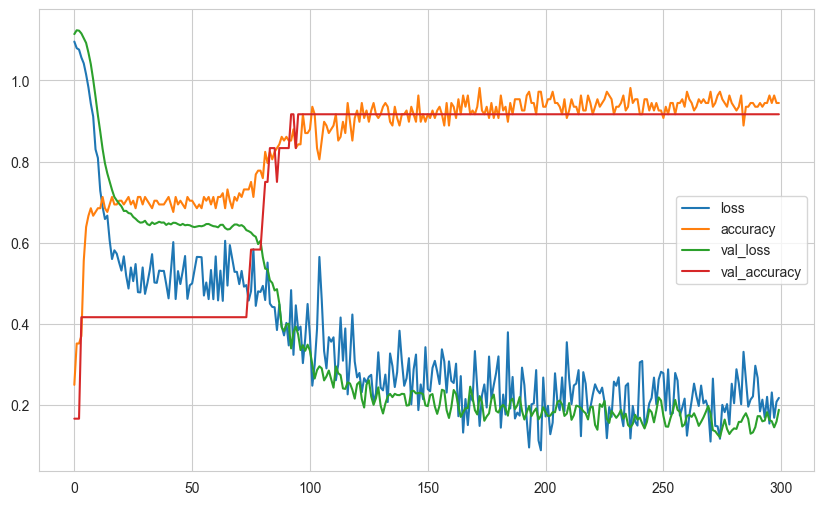

In [65]:
loss_df.plot()

In [66]:
from sklearn.metrics import classification_report, confusion_matrix

print("----------------TRAİN------------------------------------------")
y_train_pred=model.predict(X_train)
probs = np.array(y_train_pred)
y_train_pred = np.argmax(probs, axis=1)

print(confusion_matrix(y_train, y_train_pred)) 
print(classification_report(y_train, y_train_pred))

print("----------------TEST------------------------------------------")

# Eval Metrics fot Test; 

y_pred=model.predict(X_test)
probs = np.array(y_pred)
y_pred = np.argmax(probs, axis=1)

print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

----------------TRAİN------------------------------------------
4/4 [==============================] - 0s 5ms/step
[[40  0  0]
 [ 0 34  4]
 [ 0  1 41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.89      0.93        38
           2       0.91      0.98      0.94        42

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

----------------TEST------------------------------------------
1/1 [==============================] - 0s 66ms/step
[[10  0  0]
 [ 0 11  1]
 [ 0  2  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.85      0.92      0.88        12
           2       0.86      0.75      0.80         8

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.89

Drop out resulted in a drop in my test score. 

## Final Model

In [9]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
tf.random.set_seed(seed)

final_model = Sequential([Dense(units = 4,  activation = "relu"),    
                    Dense(units = 8, activation = "relu"),  
                    Dense(units = 4, activation = "tanh"),
                    Dense(units = 3, activation = "softmax")])

opt = Adam(learning_rate = 0.001)
final_model.compile(optimizer = opt, 
             loss = "sparse_categorical_crossentropy",
              metrics =["accuracy"])

early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=30)



final_model.fit(x=X_scaled,
          y=y,
          validation_split=0.1,
          batch_size=16,
          epochs=300,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/300
9/9 [==============================] - 4s 101ms/step - loss: 1.0828 - accuracy: 0.5333 - val_loss: 1.2472 - val_accuracy: 0.0000e+00
Epoch 2/300
9/9 [==============================] - 0s 24ms/step - loss: 1.0708 - accuracy: 0.5926 - val_loss: 1.2477 - val_accuracy: 0.0000e+00
Epoch 3/300
9/9 [==============================] - 0s 26ms/step - loss: 1.0588 - accuracy: 0.6519 - val_loss: 1.2489 - val_accuracy: 0.0000e+00
Epoch 4/300
9/9 [==============================] - 0s 26ms/step - loss: 1.0470 - accuracy: 0.6741 - val_loss: 1.2557 - val_accuracy: 0.0000e+00
Epoch 5/300
9/9 [==============================] - 0s 26ms/step - loss: 1.0346 - accuracy: 0.6815 - val_loss: 1.2484 - val_accuracy: 0.0000e+00
Epoch 6/300
9/9 [==============================] - 0s 24ms/step - loss: 1.0217 - accuracy: 0.6963 - val_loss: 1.2454 - val_accuracy: 0.0000e+00
Epoch 7/300
9/9 [==============================] - 0s 27ms/step - loss: 1.0078 - accuracy: 0.7037 - val_loss: 1.2455 - val_accuracy: 0.

Epoch 58/300
9/9 [==============================] - 0s 31ms/step - loss: 0.3373 - accuracy: 0.9259 - val_loss: 0.7340 - val_accuracy: 0.4667
Epoch 59/300
9/9 [==============================] - 0s 33ms/step - loss: 0.3314 - accuracy: 0.9259 - val_loss: 0.6924 - val_accuracy: 0.5333
Epoch 60/300
9/9 [==============================] - 0s 28ms/step - loss: 0.3235 - accuracy: 0.9333 - val_loss: 0.6703 - val_accuracy: 0.7333
Epoch 61/300
9/9 [==============================] - 0s 26ms/step - loss: 0.3164 - accuracy: 0.9333 - val_loss: 0.6551 - val_accuracy: 0.7333
Epoch 62/300
9/9 [==============================] - 0s 40ms/step - loss: 0.3099 - accuracy: 0.9407 - val_loss: 0.6820 - val_accuracy: 0.6000
Epoch 63/300
9/9 [==============================] - 0s 26ms/step - loss: 0.3038 - accuracy: 0.9333 - val_loss: 0.6500 - val_accuracy: 0.7333
Epoch 64/300
9/9 [==============================] - 0s 30ms/step - loss: 0.2967 - accuracy: 0.9481 - val_loss: 0.6007 - val_accuracy: 0.8000
Epoch 65/300


Epoch 116/300
9/9 [==============================] - 0s 20ms/step - loss: 0.1171 - accuracy: 0.9852 - val_loss: 0.2213 - val_accuracy: 0.9333
Epoch 117/300
9/9 [==============================] - 0s 28ms/step - loss: 0.1151 - accuracy: 0.9852 - val_loss: 0.2239 - val_accuracy: 0.9333
Epoch 118/300
9/9 [==============================] - 0s 22ms/step - loss: 0.1147 - accuracy: 0.9852 - val_loss: 0.2133 - val_accuracy: 0.9333
Epoch 119/300
9/9 [==============================] - 0s 25ms/step - loss: 0.1126 - accuracy: 0.9852 - val_loss: 0.2437 - val_accuracy: 0.9333
Epoch 120/300
9/9 [==============================] - 0s 22ms/step - loss: 0.1117 - accuracy: 0.9704 - val_loss: 0.2278 - val_accuracy: 0.9333
Epoch 121/300
9/9 [==============================] - 0s 26ms/step - loss: 0.1100 - accuracy: 0.9778 - val_loss: 0.1975 - val_accuracy: 0.9333
Epoch 122/300
9/9 [==============================] - 0s 22ms/step - loss: 0.1099 - accuracy: 0.9852 - val_loss: 0.1975 - val_accuracy: 0.9333
Epoch 

Epoch 174/300
9/9 [==============================] - 0s 27ms/step - loss: 0.0734 - accuracy: 0.9852 - val_loss: 0.1284 - val_accuracy: 0.9333
Epoch 175/300
9/9 [==============================] - 0s 22ms/step - loss: 0.0733 - accuracy: 0.9852 - val_loss: 0.1261 - val_accuracy: 0.9333
Epoch 176/300
9/9 [==============================] - 0s 22ms/step - loss: 0.0738 - accuracy: 0.9852 - val_loss: 0.1292 - val_accuracy: 0.9333
Epoch 177/300
9/9 [==============================] - 0s 23ms/step - loss: 0.0731 - accuracy: 0.9852 - val_loss: 0.1111 - val_accuracy: 1.0000
Epoch 178/300
9/9 [==============================] - 0s 24ms/step - loss: 0.0737 - accuracy: 0.9852 - val_loss: 0.1014 - val_accuracy: 1.0000
Epoch 179/300
9/9 [==============================] - 0s 27ms/step - loss: 0.0717 - accuracy: 0.9852 - val_loss: 0.1214 - val_accuracy: 0.9333
Epoch 180/300
9/9 [==============================] - 0s 24ms/step - loss: 0.0715 - accuracy: 0.9852 - val_loss: 0.1308 - val_accuracy: 0.9333
Epoch 

Epoch 232/300
9/9 [==============================] - 0s 30ms/step - loss: 0.0595 - accuracy: 0.9926 - val_loss: 0.0971 - val_accuracy: 0.9333
Epoch 233/300
9/9 [==============================] - 0s 28ms/step - loss: 0.0592 - accuracy: 0.9926 - val_loss: 0.0805 - val_accuracy: 1.0000
Epoch 234/300
9/9 [==============================] - 0s 25ms/step - loss: 0.0585 - accuracy: 0.9926 - val_loss: 0.0928 - val_accuracy: 0.9333
Epoch 235/300
9/9 [==============================] - 0s 30ms/step - loss: 0.0588 - accuracy: 0.9926 - val_loss: 0.0978 - val_accuracy: 0.9333
Epoch 236/300
9/9 [==============================] - 0s 29ms/step - loss: 0.0577 - accuracy: 0.9926 - val_loss: 0.0847 - val_accuracy: 1.0000
Epoch 237/300
9/9 [==============================] - 0s 29ms/step - loss: 0.0587 - accuracy: 0.9926 - val_loss: 0.0759 - val_accuracy: 1.0000
Epoch 238/300
9/9 [==============================] - 0s 29ms/step - loss: 0.0580 - accuracy: 0.9852 - val_loss: 0.0764 - val_accuracy: 1.0000
Epoch 

Epoch 290/300
9/9 [==============================] - 0s 31ms/step - loss: 0.0521 - accuracy: 0.9926 - val_loss: 0.0678 - val_accuracy: 1.0000
Epoch 291/300
9/9 [==============================] - 0s 26ms/step - loss: 0.0523 - accuracy: 0.9926 - val_loss: 0.0663 - val_accuracy: 1.0000
Epoch 292/300
9/9 [==============================] - 0s 27ms/step - loss: 0.0513 - accuracy: 0.9926 - val_loss: 0.0787 - val_accuracy: 0.9333
Epoch 293/300
9/9 [==============================] - 0s 22ms/step - loss: 0.0520 - accuracy: 0.9852 - val_loss: 0.0832 - val_accuracy: 0.9333
Epoch 294/300
9/9 [==============================] - 0s 23ms/step - loss: 0.0512 - accuracy: 0.9852 - val_loss: 0.0678 - val_accuracy: 1.0000
Epoch 295/300
9/9 [==============================] - 0s 20ms/step - loss: 0.0525 - accuracy: 0.9926 - val_loss: 0.0557 - val_accuracy: 1.0000
Epoch 296/300
9/9 [==============================] - 0s 23ms/step - loss: 0.0503 - accuracy: 0.9926 - val_loss: 0.0837 - val_accuracy: 0.9333
Epoch 

In [11]:
final_model.save('iris_model1.h5') 